In [53]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

In [60]:
m = GEKKO(remote=True)

# set up the time, scaled from 0 to tf
nt = 100
m.time = np.linspace(0, 1, nt)

# initialize variables
x = m.SV(value=0)
y = m.SV(value=0)
v = m.SV(value=0)

# Fixed variable
# tf = m.FV(value=0.5, lb=0, ub=2)
tf = m.FV(value=1)
tf.STATUS = 1  # allow optimizer to change it

# Manipulated variable
u = m.MV(value=np.pi / 4, lb=0, ub=2 * np.pi)
# u = m.MV(value=0)
u.STATUS = 1

g = 9.81

# Dynamics
m.Equation(x.dt() == v * m.sin(u) * tf)
m.Equation(y.dt() == -v * m.cos(u) * tf)
m.Equation(v.dt() == g * m.cos(u) * tf)

# Constraints
m.fix_initial(x, 0)
m.fix_initial(y, 0)
m.fix_initial(v, 0)

# Specify final conditions
p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

m.Equation((x-2) * final == 0)
m.Equation((y+2) * final == 0)

# m.fix_final(x, 2)
# m.fix_final(y, -2)

# Objective
m.Minimize(tf)

# Solver configuration
# m.options.IMODE = 4 # simulation
m.options.IMODE = 6  # dynamic simultaneous control
m.options.SOLVER = 3  # IPOPT
m.options.nodes = 1 # collocation nodes

m.solve(disp=True)

apm 18.10.249.119_gk_model37 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            6
   Intermediates:            0
   Connections  :            6
   Equations    :            6
   Residuals    :            6
 
 Number of state variables:           1090
 Number of total equations: -         1188
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            -98
 
 * Warning: DOF <= 0
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This

Final Time: 0.82132091769


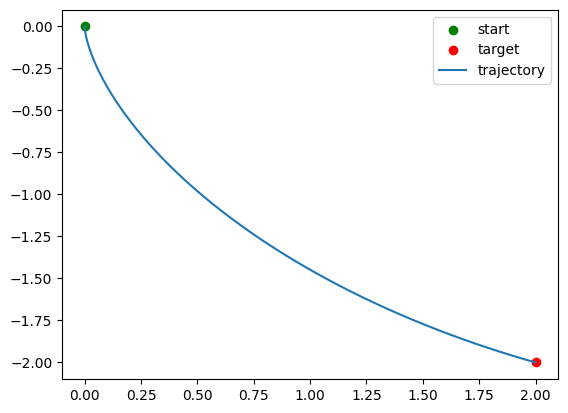

In [61]:
print("Final Time: " + str(tf.value[0]))
plt.figure()
plt.scatter(0, 0, label="start", c="g")
plt.scatter(2, -2, label="target", c="r")
# plt.scatter(x.value[0], y.value[0], label="start", c="g")
# plt.scatter(x.value[-1], y.value[-1], label="end", c="r")
plt.plot(x.value, y.value, label="trajectory")

plt.legend()

plt.show()